# RESMİ İÇE AKTARMA

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# resmi içe aktarma
img=cv2.imread("image1.jpg",0) # 0 resmi siyah beyaz olarak almamızı sağlar

In [3]:
# görselleştirme(imshow)
cv2.imshow("Görsel:",img)

key=cv2.waitKey (0) &0xFF # herhangi bir anahtar için bekle

if key==27: #esc
    cv2.destroyAllWindows() #cv2.destroyAllWindows() görüntü penceresini kapatın
elif key==ord('q'):
    cv2.imwrite("image1_gray.jpg",img) #görüntüyü siyah beyaz olarak kaydeder
    cv2.destroyAllWindows()

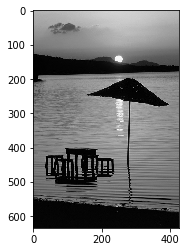

In [4]:
plt.figure()
plt.imshow(img,cmap="gray")

# VİDEO İÇE AKTARMA

In [5]:
import time 
import cv2
import matplotlib.pyplot as plt

In [6]:
video_name="video1.mp4"

In [7]:
# video içe aktarma: capture, cap
cap=cv2.VideoCapture(video_name)

In [8]:
# video yükseklik ve genişlik
print("Genişlik:",cap.get(3))
print("Yükseklik:",cap.get(4))

Genişlik: 1920.0
Yükseklik: 1080.0


In [9]:
# video aktarım kontrolü
if cap.isOpened()==False:
    print("İçe aktarılmadı")
else:
    print("Aktarım başarılı")

Aktarım başarılı


In [10]:
# video okuma
# ret: videonun başarılı şekilde dönüş değeri
# frame: video içindeki her bir resim

while True: # sürekli olarak resimleri okuma işlemini yap
    ret,frame=cap.read()
    if ret==True:
        time.sleep(0.01) # frame'lerin akış hızı
        cv2.imshow("Video1",frame)
    else: break # okuma işlemini bitir/ video da gösterilecek bir şey kalmamıştır
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break # okuma işlemini durdurma
        
cap.release() # video alımını bırak (stop capture)
cv2.destroyAllWindows() # tüm açık pencereleri kapat

# KAMERA AÇMA VE VİDEO KAYDI

In [11]:
import cv2
import matplotlib.pyplot as plt

In [12]:
# kamerayı açma
cap=cv2.VideoCapture(0)

In [13]:
# kamera yükseklik ve genişlik bilgisi
genislik=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
yukseklik=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(genislik,yukseklik)

640 480


In [14]:
# video kaydetme
# Windows için => cv2.VideoWriter_fourcc(*"DIVX"): çerçeveleri sıkıştırmak için
# 25(video akış hızı) => her saniyede görebileceğimiz frame/resim sayısı
kayıt=cv2.VideoWriter("kayıt.mp4",cv2.VideoWriter_fourcc(*"DIVX"),25,(genislik,yukseklik))
while True:
    ret,frame=cap.read()
    cv2.imshow("Video",frame)
    
    kayıt.write(frame) # her bir frame i kaydet
    if cv2.waitKey(1) & 0xFF == ord("q"): break # q tuşuna basıldığında video kaydını durdur
cap.release()
kayıt.release() # yazma işlemi bitti
cv2.destroyAllWindows()

# YENİDEN BOYUTLANDIRMA VE KIRPMA

In [15]:
import cv2
import matplotlib.pyplot as plt

In [16]:
# gray
img1=cv2.imread("image1.jpg",0)
print("Resim boyut bilgisi:",img1.shape)

Resim boyut bilgisi: (635, 425)


In [17]:
# rgb 
img1=cv2.imread("image1.jpg")
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
print("Resim boyut bilgisi:",img1.shape)

Resim boyut bilgisi: (635, 425, 3)


In [18]:
imgResized=cv2.resize(img1,(800,800))
print("Resized Image Shape:",imgResized.shape)

Resized Image Shape: (800, 800, 3)


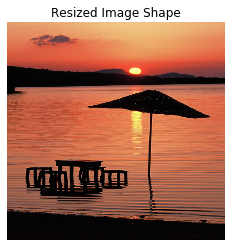

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 799.5, 799.5, -0.5),
 Text(0.5, 1, 'Resized Image Shape'),
 None)

In [19]:
plt.figure(),plt.imshow(imgResized),plt.axis("off"),plt.title("Resized Image Shape"),plt.show()

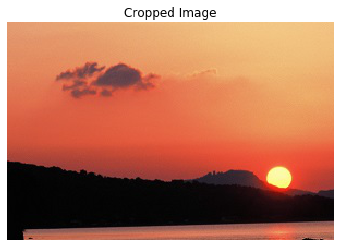

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 299.5, 199.5, -0.5),
 Text(0.5, 1, 'Cropped Image'),
 None)

In [20]:
# kırpma
img1=cv2.imread("image1.jpg")
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
imgCropped=img1[:200,0:300] # x ekseninde 0 dan 200 üncü piksele/ y ekseninde 0 dan 300 üncü piksele
plt.figure(),plt.imshow(imgCropped,),plt.axis("off"),plt.title("Cropped Image"),plt.show()

# RESİM ÜZERİNE ŞEKİL VE METİN EKLEME

In [21]:
# nesne tespit gibi işlemlerde bulunan nesnelerin belirtilmesinde kullanılır
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [22]:
#resim oluşturma
img2=np.zeros((512,512,3),np.uint8) #siyah bir resim(0 lar dan oluşan matris)
print(img2.shape)

(512, 512, 3)


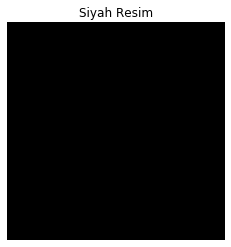

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 511.5, 511.5, -0.5),
 Text(0.5, 1, 'Siyah Resim'),
 None)

In [23]:
plt.figure(),plt.imshow(img2),plt.axis("off"),plt.title("Siyah Resim"),plt.show()

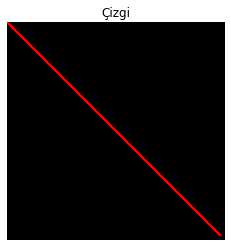

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 511.5, 511.5, -0.5),
 Text(0.5, 1, 'Çizgi'),
 None)

In [24]:
# çizgi
# cv2.line(resim,başlangıç noktası,bitiş noktası,renk,kalınlık)
cv2.line(img2,(0,0),(500,500),(255,0,0),4) # BGR(Blue-Green-Red) (255,0,0):Mavi
plt.figure(),plt.imshow(img2),plt.axis("off"),plt.title("Çizgi"),plt.show()

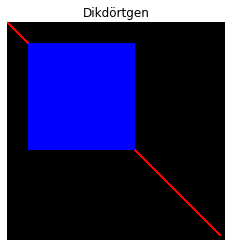

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 511.5, 511.5, -0.5),
 Text(0.5, 1, 'Dikdörtgen'),
 None)

In [25]:
# dikdörtgen
# cv2.rectangle(resim,başlangıç noktası,bitiş noktası,renk)
cv2.rectangle(img2,(50,50),(300,300),(0,0,255),cv2.FILLED) # cv2.FILLED: içini doldur
plt.figure(),plt.imshow(img2),plt.axis("off"),plt.title("Dikdörtgen"),plt.show()

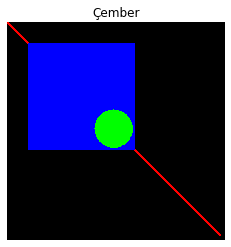

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 511.5, 511.5, -0.5),
 Text(0.5, 1, 'Çember'),
 None)

In [26]:
# çember 
# cv2.circle(resim,merkez,yarı çap,renk)
cv2.circle(img2,(250,250),45,(0,255,0),cv2.FILLED) # cv2.FILLED: içini doldur
plt.figure(),plt.imshow(img2),plt.axis("off"),plt.title("Çember"),plt.show()

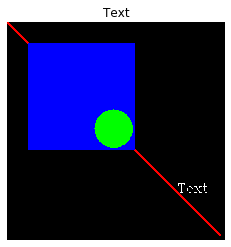

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 511.5, 511.5, -0.5),
 Text(0.5, 1, 'Text'),
 None)

In [27]:
# metin
# cv2.putText(resim,başlangıç noktası,font,kalınlık,renk)
cv2.putText(img2,"Text",(400,400),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255)) # (255,255,255): Beyaz
plt.figure(),plt.imshow(img2),plt.axis("off"),plt.title("Text"),plt.show()

# GÖRÜNTÜLERİN BİRLEŞTİRİLMESİ

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

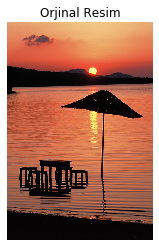

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 424.5, 634.5, -0.5),
 Text(0.5, 1, 'Orjinal Resim'),
 None)

In [29]:
# 
img3=cv2.imread("image1.jpg")
img3=cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
plt.figure(),plt.imshow(img3),plt.axis("off"),plt.title("Orjinal Resim"),plt.show()

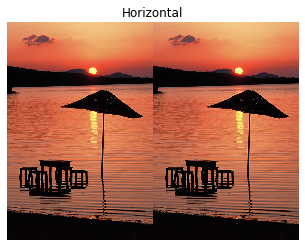

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 849.5, 634.5, -0.5),
 Text(0.5, 1, 'Horizontal'),
 None)

In [30]:
# resimleri yan yana birleştir
hor=np.hstack((img3,img3))
plt.figure(),plt.imshow(hor),plt.axis("off"),plt.title("Horizontal"),plt.show()

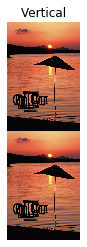

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 424.5, 1269.5, -0.5),
 Text(0.5, 1, 'Vertical'),
 None)

In [31]:
# resimleri dikey birleştir
ver=np.vstack((img3,img3))
plt.figure(),plt.imshow(ver),plt.axis("off"),plt.title("Vertical"),plt.show()

# PERSPEKTİF ÇARPITMA

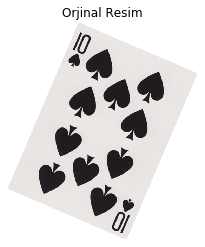

[[ 9.88318421e-01  4.80519997e-01 -2.27793757e+02]
 [-4.28952606e-01  8.92451730e-01  9.77666476e+01]
 [-1.23898125e-04  7.89697479e-05  1.00000000e+00]]


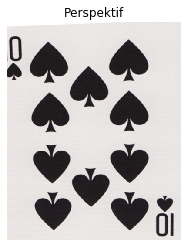

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 399.5, 499.5, -0.5),
 Text(0.5, 1, 'Perspektif'),
 None)

In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# 
img4=cv2.imread("kart.png")
plt.figure(),plt.imshow(img4),plt.axis("off"),plt.title("Orjinal Resim"),plt.show()
# resmin boyutlarını ayarla
width=400
height=500

# point1: resmin köşe piksel değerleri
points1=np.float32([[230,1],[1,472],[540,150],[338,617]])
# point2: resmin istenilen köşe piksel değerleri
points2=np.float32([[0,0],[0,height],[width,0],[width,height]])

matris=cv2.getPerspectiveTransform(points1,points2)
print(matris)

# dönüştürülmüş resim
image_out=cv2.warpPerspective(img4,matris,(width,height))

plt.figure(),plt.imshow(image_out),plt.axis("off"),plt.title("Perspektif"),plt.show()

# GÖRÜNTÜLERİ KARIŞTIRMAK

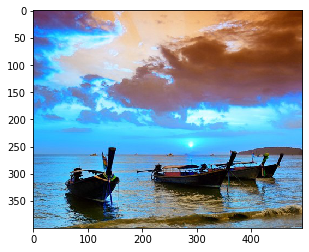

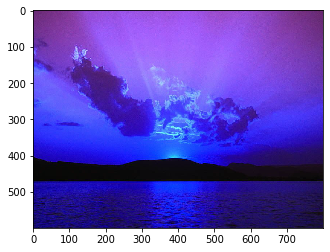

In [33]:
import matplotlib.pyplot as plt
import cv2

# opencv de görüntüler default olarak BGR olarak yüklenir
img1=cv2.imread("image2.jpg")

img2=cv2.imread("image3.jpg")

# görselleştirme
plt.figure()
plt.imshow(img1)

plt.figure()
plt.imshow(img2)

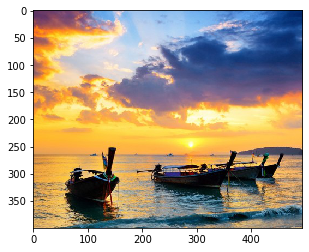

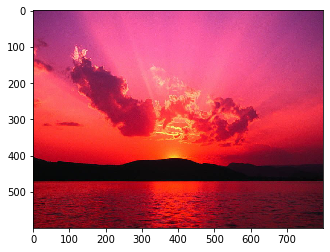

In [34]:
# cv2.cvtColor(img1,cv2.COLOR_BGR2RGB): BGR -> 
img1=cv2.imread("image2.jpg")
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2=cv2.imread("image3.jpg")
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
# görselleştirme
plt.figure()
plt.imshow(img1)

plt.figure()
plt.imshow(img2)

In [35]:
# birleştirme işlemi için boyutların kontrol edilmesi
print(img1.shape)
print(img2.shape)

(400, 495, 3)
(600, 800, 3)


(600, 600, 3)


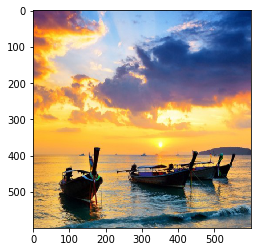

In [36]:
# yeniden boyutlandırma
img1=cv2.resize(img1,(600,600))
print(img1.shape)
plt.figure()
plt.imshow(img1)

(600, 600, 3)


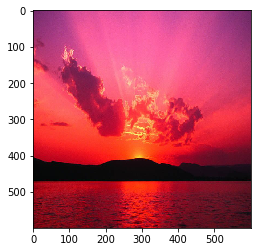

In [37]:
# yeniden boyutlandırma
img2=cv2.resize(img2,(600,600))
print(img2.shape)
plt.figure()
plt.imshow(img2)

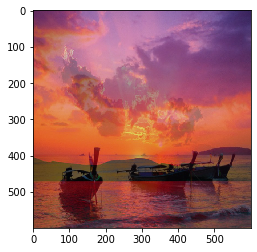

In [38]:
# görüntüleri belirli oranlarda karıştırma
# karıştırılmış resim= alpha*img1+beta*img2
blended= cv2.addWeighted(src1=img1,alpha=0.4,src2=img2,beta=0.5,gamma=0)
plt.figure()
plt.imshow(blended)

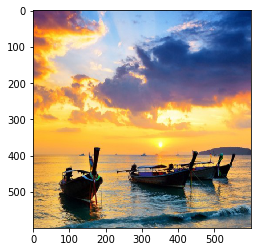

In [39]:
# karıştırılmış resim= alpha*img1+beta*img2
blended= cv2.addWeighted(src1=img1,alpha=1,src2=img2,beta=0,gamma=0)
plt.figure()
plt.imshow(blended)

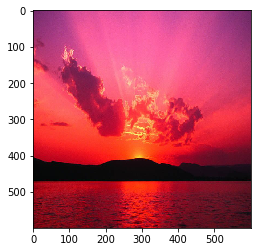

In [40]:
# karıştırılmış resim= alpha*img1+beta*img2
blended= cv2.addWeighted(src1=img1,alpha=0,src2=img2,beta=1,gamma=0)
plt.figure()
plt.imshow(blended)

# GÖRÜNTÜ EŞİKLEME

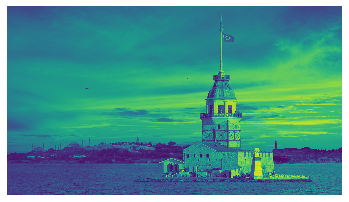

In [41]:
# eşik değerinin görüntü üzerindeki etkisi
resim=cv2.imread("image4.jpg")
# siyah beyaz resim (0-255)
resim=cv2.cvtColor(resim,cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(resim)
plt.axis("off") # eksen bilgisini kapatma
plt.show()

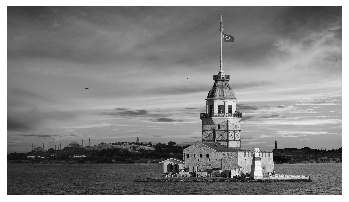

In [42]:
plt.figure()
plt.imshow(resim,cmap="gray")
plt.axis("off") # eksen bilgisini kapatma
plt.show()

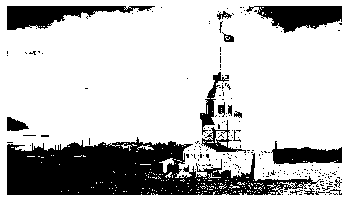

In [43]:
# eşikleme
# cv2.threshold(resim,alt sınır(üstünü beyaz yapar),gray skala da max=255)
# cv2.THRESH_BINARY: max ve min değer arasını beyaz yapar

_, thresh_img=cv2.threshold(resim,thresh=90,maxval=255,type=cv2.THRESH_BINARY)

plt.figure()
plt.imshow(thresh_img,cmap="gray")
plt.axis("off") # eksen bilgisini kapatma
plt.show()

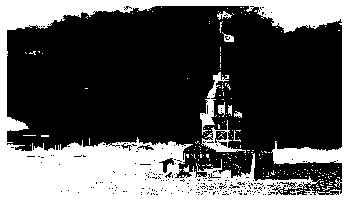

In [44]:
# cv2.THRESH_BINARY_INV: max ve min değer arasını siyah yapar
_, thresh_img=cv2.threshold(resim,thresh=90,maxval=255,type=cv2.THRESH_BINARY_INV)

plt.figure()
plt.imshow(thresh_img,cmap="gray")
plt.axis("off") # eksen bilgisini kapatma
plt.show()

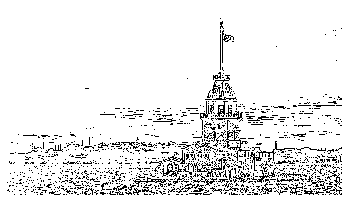

In [45]:
# Görüntü üzerinde farklı eşik değerleri kullanmak gerekebilir. Bu şekilde aynı görntünün farklı bölgeleri için farklı eşik değerleri belirlenir
# komşu piksel değerleri ile eşik değerleri elde edilir
# Adaptive(uyarlamalı) eşik değeri

# cv2.AdaptiveThreshold(resim,maksimum değer,adaptive metodu,cv2.eşikleme türü,blok size,c:ortalamadan/ağırlıklı ortalamadan çıkarılabilen sayı)
thresh_img2=cv2.adaptiveThreshold(resim,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8)

plt.figure()
plt.imshow(thresh_img2,cmap="gray")
plt.axis("off") # eksen bilgisini kapatma
plt.show()

# BULANIKLAŞTIRMA

- Görüntüye düşük geçişli bir filtre uygulanır
- Gürültüler / detaylar azaltılır

# OpenCv de 3 Temel Bulanıklaştırma Tekniği
- Ortalama Bulanıklaştırma
- Gauss Bulanıklaştırma
- Medyan Bulanıklaştırma


In [46]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# uyarıları kapatmak
import warnings
warnings.filterwarnings("ignore")

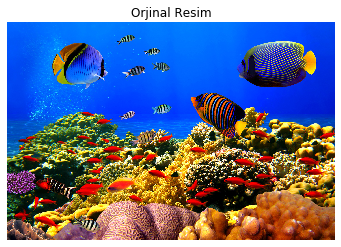

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 2143.5, 1423.5, -0.5),
 Text(0.5, 1, 'Orjinal Resim'),
 None)

In [48]:
# ortalama bulanıklaştırma
resim=cv2.imread("balik.jpg")
# BGR -> RGB
resim=cv2.cvtColor(resim,cv2.COLOR_BGR2RGB)
plt.figure(),plt.imshow(resim),plt.axis("off"),plt.title("Orjinal Resim"),plt.show()

- ORTALAMA BULANIKLAŞTIRMA

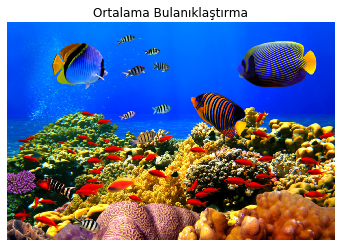

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1, 'Ortalama Bulanıklaştırma'),
 (0.0, 1.0, 0.0, 1.0),
 None)

In [49]:
# cv2.blur
ob=cv2.blur(resim,ksize=(5,5))
plt.figure(),plt.title("Ortalama Bulanıklaştırma"),plt.axis("off"),plt.imshow(ob),plt.show()

- GAUSSİAN BULANIKLAŞTIRMA

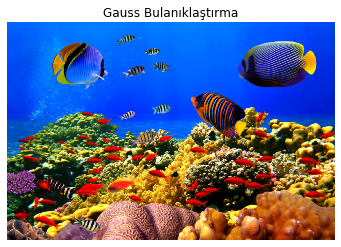

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1, 'Gauss Bulanıklaştırma'),
 (0.0, 1.0, 0.0, 1.0),
 None)

In [50]:
# cv2.GaussianBlur
gb=cv2.GaussianBlur(resim,ksize=(5,5),sigmaX=7)
plt.figure(),plt.title("Gauss Bulanıklaştırma"),plt.axis("off"),plt.imshow(gb),plt.show()

- MEDYAN BULANIKLAŞTIRMA

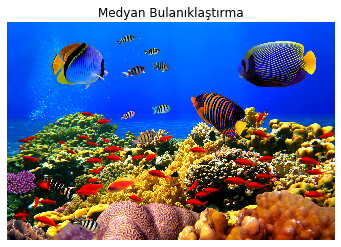

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1, 'Medyan Bulanıklaştırma'),
 (0.0, 1.0, 0.0, 1.0),
 None)

In [51]:
# cv2.medianBlur
mb=cv2.medianBlur(resim,ksize=3)
plt.figure(),plt.title("Medyan Bulanıklaştırma"),plt.axis("off"),plt.imshow(mb),plt.show()

- Gaussian Gürültü Ekleme

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


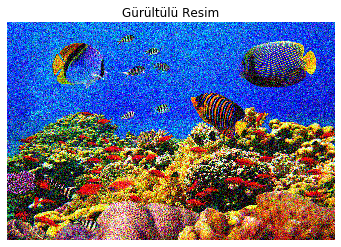

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 2143.5, 1423.5, -0.5),
 Text(0.5, 1, 'Gürültülü Resim'),
 None)

In [52]:
# resimlere gürültü/gaussianNoise ekleme
def gaussianNoise(image):
    row,col,ch=image.shape
    mean=0 # ortalama
    var=0.05 # varyans
    sigma=var**0.5 # standart sapma
    
    gauss=np.random.normal(mean,sigma,(row,col,ch))
    gauss=gauss.reshape(row,col,ch)
    noisy=image+gauss
    return noisy

# gürültü eklemek için görüntüleri 0-1 arasında normalize etmek
resim=cv2.imread("balik.jpg")
# BGR -> RGB
resim=cv2.cvtColor(resim,cv2.COLOR_BGR2RGB)/255
gaussianNoiseImg=gaussianNoise(resim)
plt.figure(),plt.imshow(gaussianNoiseImg),plt.axis("off"),plt.title("Gürültülü Resim"),plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


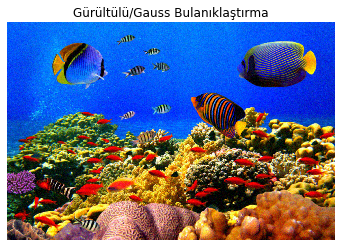

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1, 'Gürültülü/Gauss Bulanıklaştırma'),
 (0.0, 1.0, 0.0, 1.0),
 None)

In [53]:
# gürültü eklenmiş resime gauss blur
# cv2.GaussianBlur
gb1=cv2.GaussianBlur(gaussianNoiseImg,ksize=(5,5),sigmaX=7)
plt.figure(),plt.title("Gürültülü/Gauss Bulanıklaştırma"),plt.axis("off"),plt.imshow(gb1),plt.show()

- Tuz Biber Gürültüsü Ekleme

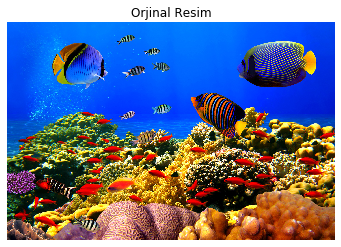

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 2143.5, 1423.5, -0.5),
 Text(0.5, 1, 'Orjinal Resim'),
 None)

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

resim=cv2.imread("balik.jpg")
resim=cv2.cvtColor(resim,cv2.COLOR_BGR2RGB)

plt.figure(),plt.imshow(resim),plt.axis("off"),plt.title("Orjinal Resim"),plt.show()

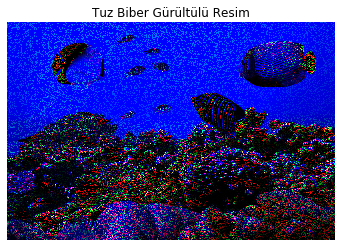

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 2143.5, 1423.5, -0.5),
 Text(0.5, 1, 'Tuz Biber Gürültülü Resim'),
 None)

In [55]:
# tuz biber gürültüsü ekleme
def saltPepperNoise(image):
    row,col,ch=image.shape
    s_vs_p= 0.5 # salt ve pepper oranı
    amount=0.004
    noisy=np.copy(image)
    
    # salt/beyaz
    num_salt=np.ceil(amount+image.size*s_vs_p)
    coords=[np.random.randint(0,i-1,int(num_salt)) for i in image.shape] # rastgele olarak koordinatlar belirlenir
    noisy[coords]=1 # beyaz eklenir
    
    # pepper/siyah
    num_pepper=np.ceil(amount+image.size*(1-s_vs_p))
    coords=[np.random.randint(0,i-1,int(num_pepper)) for i in image.shape] # rastgele olarak koordinatlar belirlenir
    noisy[coords]=0 # siyah eklenir
    
    return noisy
spNoise=saltPepperNoise(resim)
plt.figure(),plt.imshow(spNoise),plt.axis("off"),plt.title("Tuz Biber Gürültülü Resim"),plt.show()



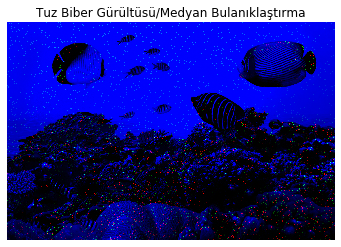

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1, 'Tuz Biber Gürültüsü/Medyan Bulanıklaştırma'),
 (0.0, 1.0, 0.0, 1.0),
 None)

In [56]:
# cv2.medianBlur
mb1=cv2.medianBlur(spNoise,ksize=3)
plt.figure(),plt.title("Tuz Biber Gürültüsü/Medyan Bulanıklaştırma"),plt.axis("off"),plt.imshow(mb1),plt.show()

# MORFOLOJİK İŞLEMLER

- Erozyon (nesnenin sınırlarını aşındırır/küçültür)
- Genişleme (nesnenin sınırlarını kalınlaştırır/erozyonun tersidir)
- Açma (Erozyon + Genişleme)(gürültü giderilmesinde sıklıkla kullanılmaktadır)
- Kapatma (Genişleme + Erozyon)(küçük noktaları kapatmak için kullanılmaktadır)
- Morfolojik Gradyan (Resmin genişleme ve erozyonu arasındaki farkı)

In [57]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

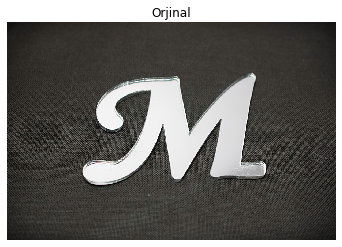

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1, 'Orjinal'),
 (-0.5, 899.5, 595.5, -0.5),
 None)

In [58]:
# resmi içe aktarma
img=cv2.imread("image5.jpg")
plt.figure(),plt.title("Orjinal"),plt.imshow(img,cmap="gray"),plt.axis("off"),plt.show()

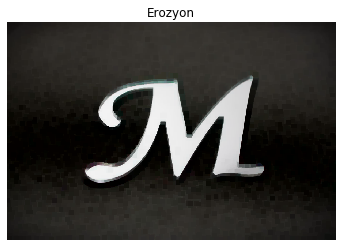

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1, 'Erozyon'),
 (-0.5, 899.5, 595.5, -0.5),
 None)

In [59]:
# erozyon (sınırları küçültme)
# cv2.erode
kernel=np.ones((5,5),dtype=np.uint8)
result1=cv2.erode(img,kernel,iterations=3)
plt.figure(),plt.title("Erozyon"),plt.imshow(result1,cmap="gray"),plt.axis("off"),plt.show()

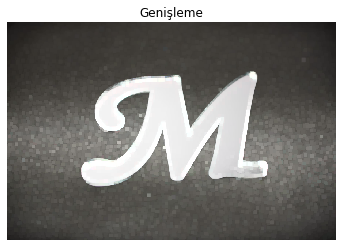

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1, 'Genişleme'),
 (-0.5, 899.5, 595.5, -0.5),
 None)

In [60]:
# genişleme/dilation
# cv2.dilate
kernel=np.ones((5,5),dtype=np.uint8)
result2=cv2.dilate(img,kernel,iterations=2)
plt.figure(),plt.title("Genişleme"),plt.imshow(result2,cmap="gray"),plt.axis("off"),plt.show()

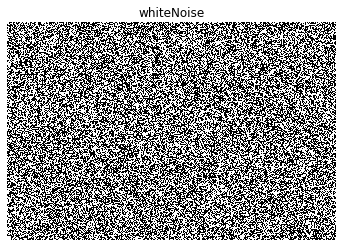

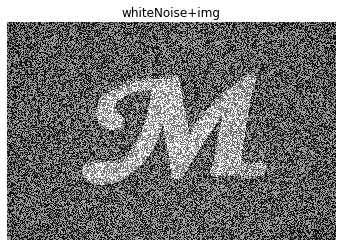

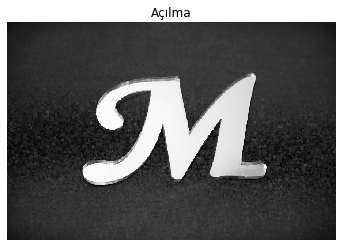

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1, 'Açılma'),
 (-0.5, 899.5, 595.5, -0.5),
 None)

In [61]:
# açılma (gürültü azaltır)
# resmi içe aktarma
img=cv2.imread("image5.jpg",0)

#beyaz bir gürültü oluşturalım ve açılma ile gürültüden kurtulalım
whiteNoise=np.random.randint(0,2,size=img.shape[:2]) # img.shape[:2]= yükseklik ve genişlik
whiteNoise=whiteNoise*255
plt.figure(),plt.title("whiteNoise"),plt.imshow(whiteNoise,cmap="gray"),plt.axis("off"),plt.show()

# gürültünün resme dahil edilmesi
noise_img=whiteNoise+img
plt.figure(),plt.title("whiteNoise+img"),plt.imshow(noise_img,cmap="gray"),plt.axis("off"),plt.show()

#açılma
kernel=np.ones((5,5),dtype=np.uint8)
opening=cv2.morphologyEx(noise_img.astype(np.float32),cv2.MORPH_OPEN,kernel)
plt.figure(),plt.title("Açılma"),plt.imshow(opening,cmap="gray"),plt.axis("off"),plt.show()

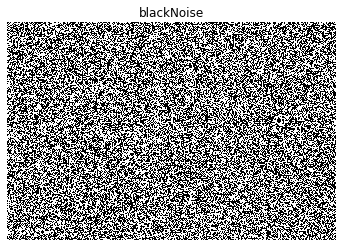

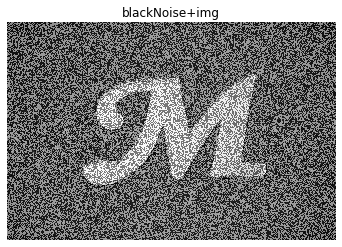

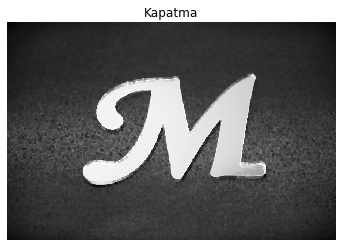

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1, 'Kapatma'),
 (-0.5, 899.5, 595.5, -0.5),
 None)

In [62]:
# kapatma

# siyah bir gürültü oluşturalım
blackNoise=np.random.randint(0,2,size=img.shape[:2]) # img.shape[:2]= yükseklik ve genişlik
blackNoise=blackNoise*-255
plt.figure(),plt.title("blackNoise"),plt.imshow(blackNoise,cmap="gray"),plt.axis("off"),plt.show()

# gürültünün resme dahil edilmesi
noise_img=blackNoise+img
plt.figure(),plt.title("blackNoise+img"),plt.imshow(noise_img,cmap="gray"),plt.axis("off"),plt.show()

# kapatma
kernel=np.ones((5,5),dtype=np.uint8)
closing=cv2.morphologyEx(noise_img.astype(np.float32),cv2.MORPH_CLOSE,kernel)
plt.figure(),plt.title("Kapatma"),plt.imshow(closing,cmap="gray"),plt.axis("off"),plt.show()

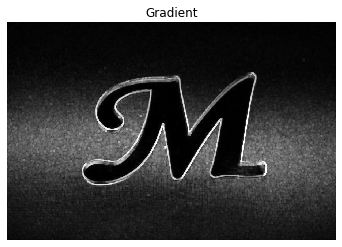

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1, 'Gradient'),
 (-0.5, 899.5, 595.5, -0.5),
 None)

In [63]:
#gradient (kenarların tespitini sağlar)
kernel=np.ones((5,5),dtype=np.uint8)
grad=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
plt.figure(),plt.title("Gradient"),plt.imshow(grad,cmap="gray"),plt.axis("off"),plt.show()

# GRADYANLAR

- görüntüdeki yoğunluk veya renkteki yönlü değişiklik
- kenar algılama işlemlerinde kullanılır

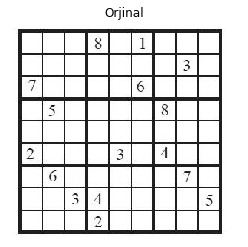

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1, 'Orjinal'),
 (-0.5, 315.5, 293.5, -0.5),
 None)

In [64]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread("sudoku.jpg",0)
plt.figure(),plt.title("Orjinal"),plt.imshow(img,cmap="gray"),plt.axis("off"),plt.show()

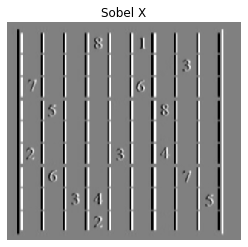

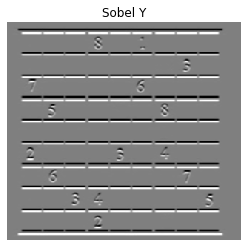

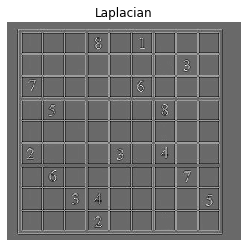

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1, 'Laplacian'),
 (-0.5, 315.5, 293.5, -0.5),
 None)

In [65]:
# x ve y koordinat ekseni yönündeki kenarların tespiti

# x gradyan
sobelx=cv2.Sobel(img,ddepth=cv2.CV_16S, dx=1,dy=0,ksize=5)
plt.figure(),plt.title("Sobel X"),plt.imshow(sobelx,cmap="gray"),plt.axis("off"),plt.show()

# y gradyan
sobely=cv2.Sobel(img,ddepth=cv2.CV_16S, dx=0,dy=1,ksize=5)
plt.figure(),plt.title("Sobel Y"),plt.imshow(sobely,cmap="gray"),plt.axis("off"),plt.show()

#laplacian gradyan
laplacian=cv2.Laplacian(img,ddepth=cv2.CV_16S)
plt.figure(),plt.title("Laplacian"),plt.imshow(laplacian,cmap="gray"),plt.axis("off"),plt.show()

# HİSTOGRAM

- görüntüdeki ton dağılımının grafiksel olarak temsilidir
- her bir ton değeri için piksel sayısını belirtir

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x215c14c9c18>)

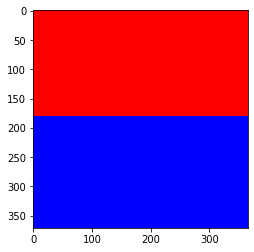

In [66]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# resmi içe aktar
img=cv2.imread("red_blue.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(),plt.imshow(img)

(256, 1)


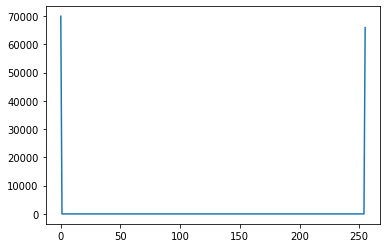

In [67]:
# histogram
img_his=cv2.calcHist([img],channels=[0],mask=None,histSize=[256],ranges=[0,256])
print(img_his.shape)
plt.figure()
plt.plot(img_his)

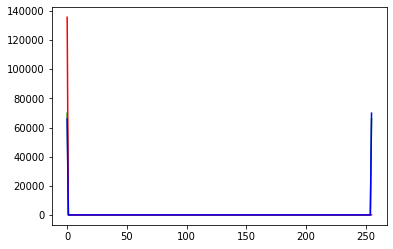

In [68]:
color={"b","g","r"}
plt.figure()
for i,c in enumerate(color):
    hist=cv2.calcHist([img],channels=[i],mask=None,histSize=[256],ranges=[0,256])
    plt.plot(hist,color=c)